In [2]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures


In [3]:
data = pd.read_csv('restaurant_reviews.csv')

In [6]:
print(data.columns)


Index(['Review Text', 'Review', 'Recommends'], dtype='object')


In [7]:
print(data.head())


                                         Review Text  Review Recommends
0  Friendly staff, good food and homely environme...     NaN       True
1  Well...The Food was Good___Intrerior design is...     NaN       True
2  The man who is foodie like me for him arabian ...     5.0        NaN
3  ordered pizza and they were unable to serve th...     NaN      False
4  This place is too much comfortable & food is d...     4.0        NaN


In [21]:
import pandas as pd
from nltk import bigrams, FreqDist
import networkx as nx
import matplotlib.pyplot as plt


In [23]:
# Load the dataset
df = pd.read_csv('restaurant_reviews.csv')

# Preprocess the text data
df['cleaned_text'] = df['Review Text'].apply(preprocess_text)


In [24]:
# Extract bigrams and compute frequency distribution
reviews_bigrams = list(bigrams(df['cleaned_text'].explode()))
freq_dist = FreqDist(reviews_bigrams)

# Identify significant collocations
significant_collocations = [(bigram, freq) for bigram, freq in freq_dist.items() if freq > 5]
significant_collocations.sort(key=lambda x: x[1], reverse=True)


C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pyla

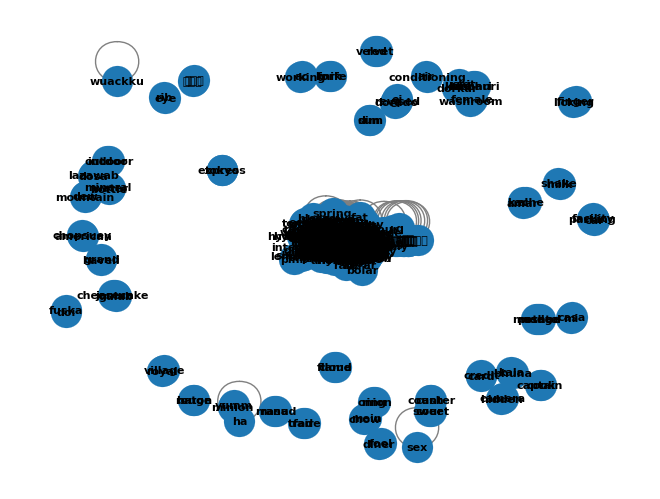

In [25]:
# Create a network graph
G = nx.Graph()

# Add nodes and edges to the graph
for collocation, freq in significant_collocations:
    word1, word2 = collocation
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2, weight=freq)

# Plot the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=500, font_weight='bold', edge_color='gray', linewidths=0.1)
plt.show()


In [26]:
import warnings

# Suppress font-related warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JBN\anaconda3\Lib\site-packages\IPython\core\pyla

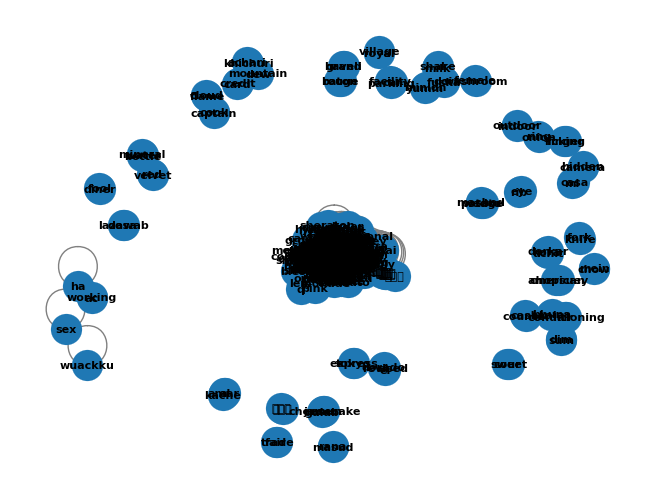

In [27]:
# Create a network graph
G = nx.Graph()

# Add nodes and edges to the graph
for collocation, freq in significant_collocations:
    word1, word2 = collocation
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2, weight=freq)

# Plot the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=500, font_weight='bold', edge_color='gray', linewidths=0.1)
plt.show()
